In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

In [2]:
# Load the dataset
file = "/content/milknew.csv"
df = pd.read_csv(file)

# Display the first few rows of the dataframe
print(df.head())

# Print the number of rows and columns
print(f"Number of rows = {df.shape[0]}")
print(f"Number of columns = {df.shape[1]}")

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
0  6.6          35      1     0     1          0     254    high
1  6.6          36      0     1     0          1     253    high
2  8.5          70      1     1     1          1     246     low
3  9.5          34      1     1     0          1     255     low
4  6.6          37      0     0     0          0     255  medium
Number of rows = 1059
Number of columns = 8


In [3]:
print("List of columns: \n", list(df.columns))

# Identify categorical and numeric columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(exclude=['object']).columns.tolist()

print(f"Categorical columns = {cat_cols}")
print(f"Numeric columns = {num_cols}")

# Print data types of columns
print("Data types of columns: \n", df.dtypes)

# Print dataframe info
print("Data Information: \n")
df.info()

List of columns: 
 ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour', 'Grade']
Categorical columns = ['Grade']
Numeric columns = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
Data types of columns: 
 pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object
Data Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), obj

In [4]:
# Check for duplicate records/rows
print('Checking for duplicate records/rows: \n')
if df.duplicated().any():
    print("Duplicate rows in dataset")
else:
    print("No Duplicates in dataset")

# Display duplicate rows if any
print("Display Duplicate rows")
print(df[df.duplicated()])

# Drop duplicate rows and create a new dataframe
print('Drop Duplicates')
df1 = df.drop_duplicates()


Checking for duplicate records/rows: 

Duplicate rows in dataset
Display Duplicate rows
       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour   Grade
35    6.8          45      0     1     1          1     255    high
48    9.5          34      1     1     0          1     255     low
50    6.6          37      1     1     1          1     255    high
51    5.5          45      1     0     1          1     250     low
52    4.5          60      0     1     1          1     250     low
...   ...         ...    ...   ...   ...        ...     ...     ...
1054  6.7          45      1     1     0          0     247  medium
1055  6.7          38      1     0     1          0     255    high
1056  3.0          40      1     1     1          1     255     low
1057  6.8          43      1     0     1          0     250    high
1058  8.6          55      0     1     1          1     255     low

[976 rows x 8 columns]
Drop Duplicates


In [5]:
# Display the shape of the dataset after dropping duplicates
print("Dataset after dropping the duplicates")
print(df1.shape)

# Check for missing values in the dataset
print("Checking for missing values in dataset")
print(df1.isnull().sum())

# Statistical measure of the numeric columns/features
print("Statistical measure of the numeric columns/features:")
print(df1.describe())


Dataset after dropping the duplicates
(83, 8)
Checking for missing values in dataset
pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64
Statistical measure of the numeric columns/features:
              pH  Temprature      Taste       Odor       Fat   Turbidity  \
count  83.000000   83.000000  83.000000  83.000000  83.000000  83.000000   
mean    6.668675   43.698795   0.493976   0.397590   0.602410   0.433735   
std     0.986856    9.379187   0.503003   0.492375   0.492375   0.498602   
min     3.000000   34.000000   0.000000   0.000000   0.000000   0.000000   
25%     6.500000   38.000000   0.000000   0.000000   0.000000   0.000000   
50%     6.600000   41.000000   0.000000   0.000000   1.000000   0.000000   
75%     6.800000   45.000000   1.000000   1.000000   1.000000   1.000000   
max     9.500000   90.000000   1.000000   1.000000   1.000000   1.000000   

           Colour  
count   83.00000

Unique values in columns:
pH
6.6    25
6.8    19
6.5    16
6.7     5
8.5     2
4.5     2
8.6     2
7.4     2
3.0     2
9.0     2
9.5     1
5.5     1
8.1     1
5.6     1
4.7     1
6.4     1
Name: count, dtype: int64
----------------------------------------
Temprature
45    16
40    11
38    11
50     6
43     6
37     6
36     5
55     4
41     4
35     4
34     3
70     2
90     1
66     1
60     1
42     1
65     1
Name: count, dtype: int64
----------------------------------------
Taste
0    42
1    41
Name: count, dtype: int64
----------------------------------------
Odor
0    50
1    33
Name: count, dtype: int64
----------------------------------------
Fat 
1    50
0    33
Name: count, dtype: int64
----------------------------------------
Turbidity
0    47
1    36
Name: count, dtype: int64
----------------------------------------
Colour
255    43
250    13
245     8
246     7
240     4
253     3
247     3
254     1
248     1
Name: count, dtype: int64
--------------------------------

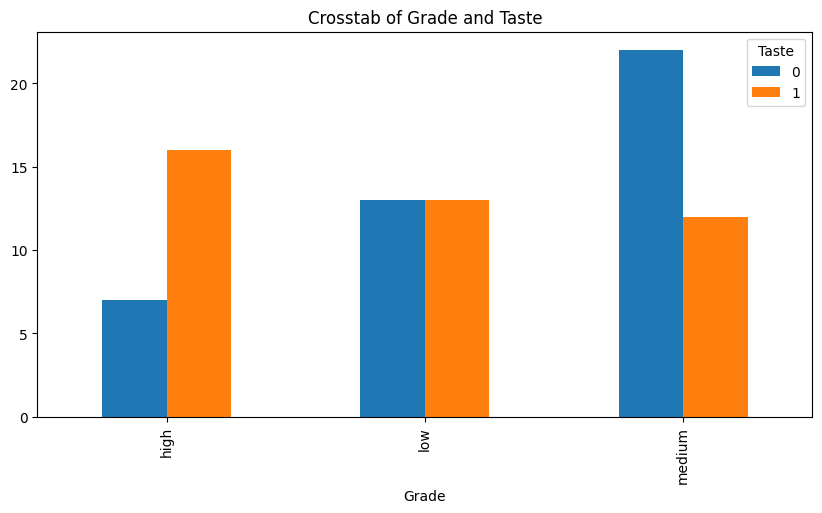

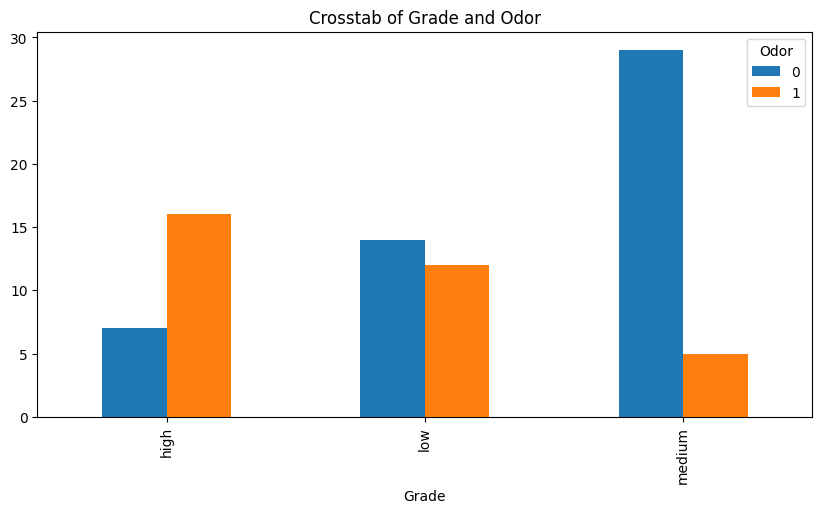

Column 'Fat' not found in the DataFrame.


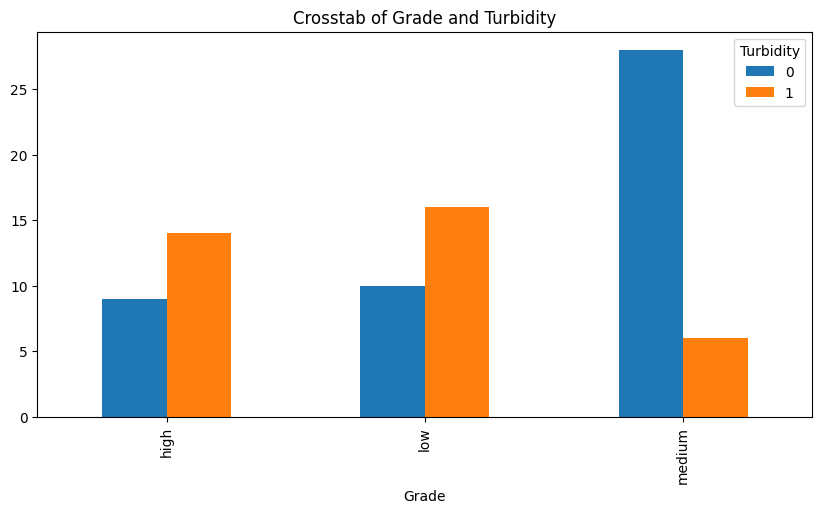

In [6]:
# Unique values in each column
print('Unique values in columns:')
for col in df1.columns:
    print(df1[col].value_counts())
    print("-" * 40)

# Crosstab plots for selected categorical columns
cols = ['Taste', 'Odor', 'Fat', 'Turbidity']
for col in cols:
    # Check if the column exists before creating the crosstab
    if col in df1.columns:
        pd.crosstab(df1.Grade, df1[col]).plot(kind='bar', figsize=(10, 5), title=f'Crosstab of Grade and {col}')
        plt.show()
    else:
        print(f"Column '{col}' not found in the DataFrame.")


Grade
medium    34
low       26
high      23
Name: count, dtype: int64


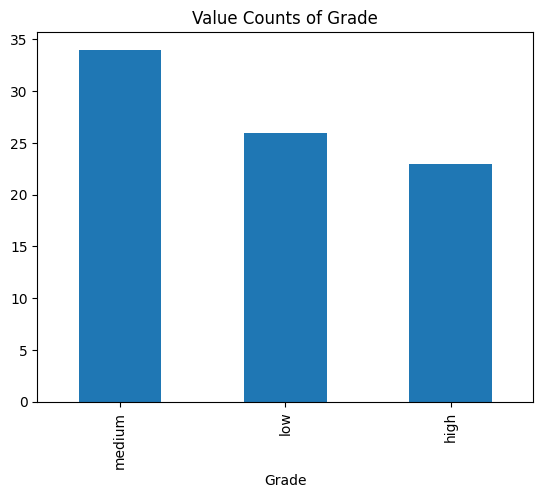

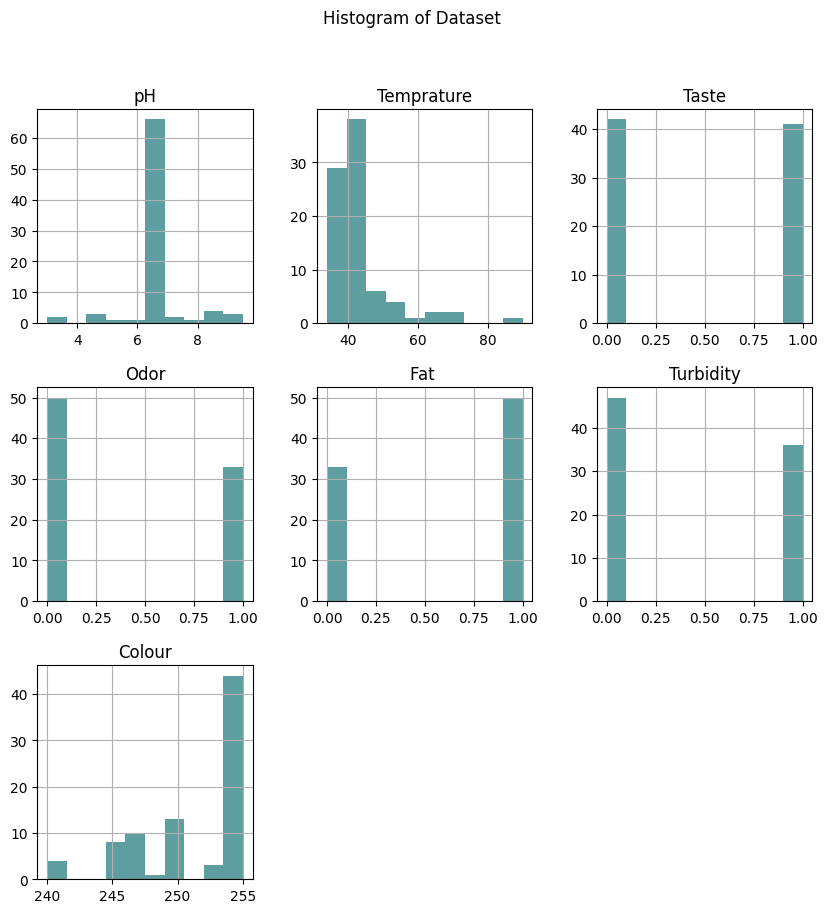

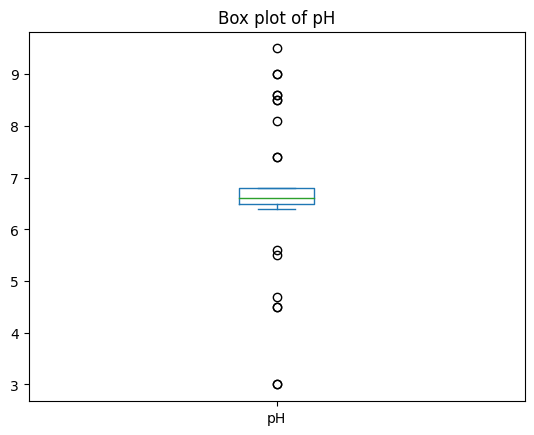

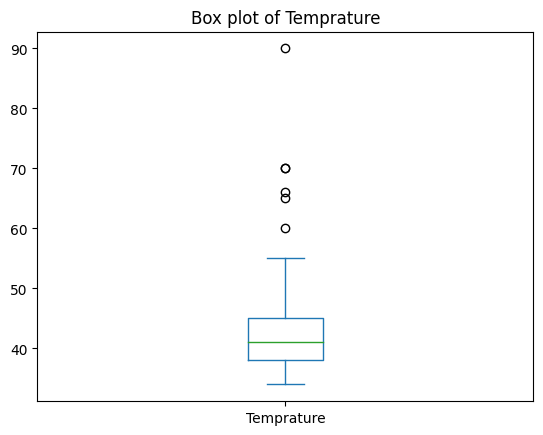

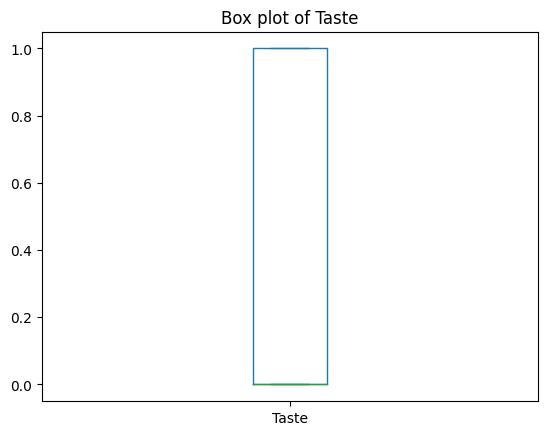

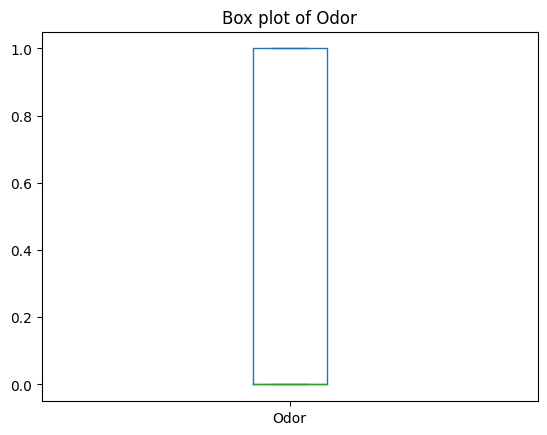

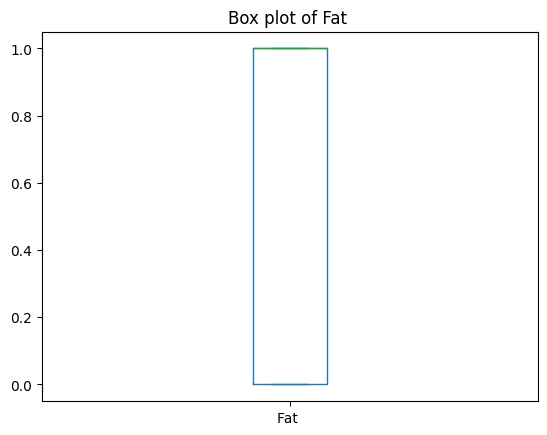

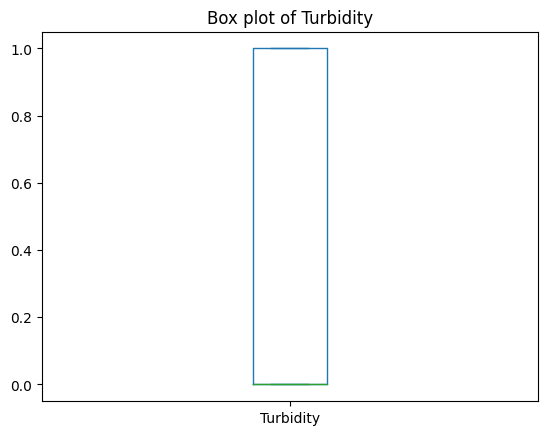

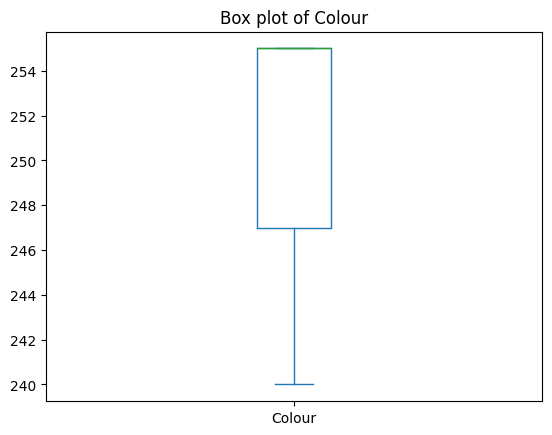

In [7]:
# Value counts of the Grade column
print(df1["Grade"].value_counts())
df1["Grade"].value_counts().plot(kind="bar", title='Value Counts of Grade')
plt.show()

# Histogram of the data
data_hist_plot = df1.hist(figsize=(10, 10), color='#5F9EA0')
plt.suptitle('Histogram of Dataset')
plt.show()

# Box plots of the numeric columns
for col in num_cols:
    df1[col].plot(kind='box', title=f'Box plot of {col}')
    plt.show()

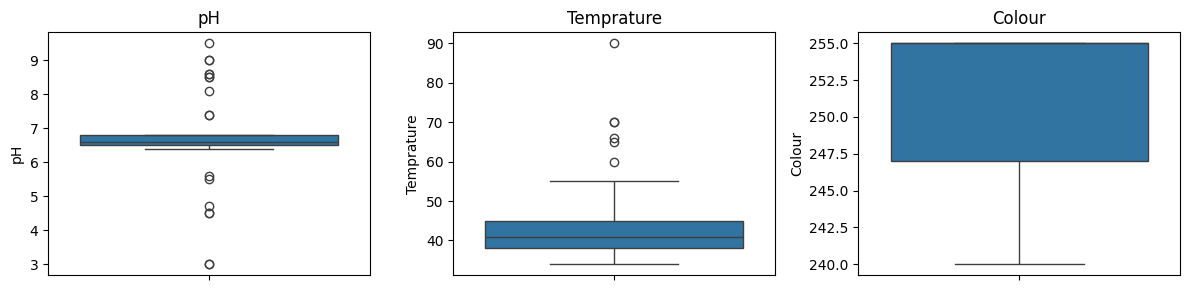

Grade             high         low      medium
pH            6.665217    6.726923    6.626471
Temprature   39.913043   51.500000   40.294118
Taste         0.695652    0.500000    0.352941
Odor          0.695652    0.461538    0.147059
Fat           0.956522    0.653846    0.323529
Turbidity     0.608696    0.615385    0.176471
Colour      252.739130  251.615385  250.117647
Convert Target Variable (Grade) into Numbers
low = 0, medium = 1, high = 2


In [8]:
# Box plots of numeric columns in a single figure
cols = ['pH', 'Temprature', 'Colour']
fig, axes = plt.subplots(ncols=3, figsize=(12, 3))
for col, ax in zip(cols, axes):
    sns.boxplot(data=df1[col], ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# Groupby Grade and mean of the columns
print(df1.groupby('Grade').mean().T)

# Convert Target Variable (Grade) into Numbers
print('Convert Target Variable (Grade) into Numbers')
print("low = 0, medium = 1, high = 2")


In [9]:
def grade_label(x):
    if x == 'high':
        return 2
    elif x == 'medium':
        return 1
    else:
        return 0

df1['Grade'] = df1['Grade'].apply(lambda x: grade_label(x))
print("Target variable Grade after encoding")
print(df1.head())

# Split the data into features and target variable
print("X-Features and y-Labels")
X = df1.drop('Grade', axis=1)
y = df1.Grade
print(X.head())
print("")
print("y-label")
print(y.head())

Target variable Grade after encoding
    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour  Grade
0  6.6          35      1     0     1          0     254      2
1  6.6          36      0     1     0          1     253      2
2  8.5          70      1     1     1          1     246      0
3  9.5          34      1     1     0          1     255      0
4  6.6          37      0     0     0          0     255      1
X-Features and y-Labels
    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0  6.6          35      1     0     1          0     254
1  6.6          36      0     1     0          1     253
2  8.5          70      1     1     1          1     246
3  9.5          34      1     1     0          1     255
4  6.6          37      0     0     0          0     255

y-label
0    2
1    2
2    0
3    0
4    1
Name: Grade, dtype: int64


<ipython-input-9-af9b25728806>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grade'] = df1['Grade'].apply(lambda x: grade_label(x))


In [10]:
# Splitting the data into training and testing
print('Splitting the data into training and testing')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training size =", x_train.shape)
print("Testing size =", x_test.shape)


Splitting the data into training and testing
Training size = (66, 7)
Testing size = (17, 7)


In [11]:
# Create model objects
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ETC = ExtraTreesClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GBC = GradientBoostingClassifier()
ABC = AdaBoostClassifier()
NB = MultinomialNB()

In [12]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# List of models
models = [LR, DT, RF, ETC, SVM, KNN, GBC, ABC, NB]
features = X
labels = y
CV = 5
accu_list = [] # Accuracy List
ModelName = [] # Model Name List

In [13]:
# Perform stratified cross-validation and collect accuracy
skf = StratifiedKFold(n_splits=CV)

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=skf)
    accu_list.append(accuracies.mean() * 100)
    ModelName.append(model_name)


In [14]:
# Create a DataFrame with model names and their cross-validation accuracies
acc_df = pd.DataFrame({"Model": ModelName, "Cross_Val_Accuracy": accu_list})
acc_df = acc_df.sort_values('Cross_Val_Accuracy', ascending=False)
print(acc_df)

print("Best Model with Highest Accuracy")
print(f'{acc_df.iloc[0, 0]} with {round(acc_df.iloc[0, 1], 2)}% Accuracy')


                        Model  Cross_Val_Accuracy
6  GradientBoostingClassifier           85.588235
7          AdaBoostClassifier           80.808824
2      RandomForestClassifier           79.485294
3        ExtraTreesClassifier           76.985294
1      DecisionTreeClassifier           75.808824
8               MultinomialNB           71.250000
5        KNeighborsClassifier           68.750000
0          LogisticRegression           63.970588
4                         SVC           40.955882
Best Model with Highest Accuracy
GradientBoostingClassifier with 85.59% Accuracy


In [15]:
GBC.fit(x_train, y_train)
y_pred = GBC.predict(x_test)
print("")
print("Evaluation Metrics for GradientBoostingClassifier")
print(classification_report(y_test, y_pred))

# Predictive System using GradientBoostingClassifier
sample_data_1 = [6.5, 35, 1, 0, 1, 0, 254]
sample_data_2 = [9.5, 34, 1, 1, 0, 1, 255]
sample_data_3 = [6.6, 37, 0, 0, 0, 0, 255]


Evaluation Metrics for GradientBoostingClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.78      1.00      0.88         7
           2       1.00      0.60      0.75         5

    accuracy                           0.88        17
   macro avg       0.93      0.87      0.88        17
weighted avg       0.91      0.88      0.88        17



In [16]:
# Input data from user
ph = float(input('Enter the pH Value = '))
temp = float(input('Enter the Temperature = '))
taste = float(input('Enter the Taste = '))
odor = float(input('Enter the Odor = '))
fat = float(input('Enter the Fat = '))
turb = float(input('Enter the Turbidity = '))
color = float(input('Enter the Colour = '))

input_data = [ph, temp, taste, odor, fat, turb, color]
prediction = GBC.predict([input_data])
if prediction[0] == 2:
    print("Milk is of 'HIGH GRADE'")
elif prediction[0] == 1:
    print("Milk is of 'AVERAGE GRADE'")
else:
    print("Milk is of 'LOW GRADE'")


Enter the pH Value = 6
Enter the Temperature = 20
Enter the Taste = 1
Enter the Odor = 1
Enter the Fat = 1
Enter the Turbidity = 1
Enter the Colour = 255
Milk is of 'HIGH GRADE'


In [17]:
# Input data from user
ph = float(input('Enter the pH Value = '))
temp = float(input('Enter the Temperature = '))
taste = float(input('Enter the Taste = '))
odor = float(input('Enter the Odor = '))
fat = float(input('Enter the Fat = '))
turb = float(input('Enter the Turbidity = '))
color = float(input('Enter the Colour = '))

input_data = [ph, temp, taste, odor, fat, turb, color]
prediction = GBC.predict([input_data])
if prediction[0] == 2:
    print("Milk is of 'HIGH GRADE'")
elif prediction[0] == 1:
    print("Milk is of 'AVERAGE GRADE'")
else:
    print("Milk is of 'LOW GRADE'")


Enter the pH Value = 8
Enter the Temperature = 27
Enter the Taste = 1
Enter the Odor = 0
Enter the Fat = 0
Enter the Turbidity = 1
Enter the Colour = 250
Milk is of 'LOW GRADE'


In [18]:
# Input data from user
ph = float(input('Enter the pH Value = '))
temp = float(input('Enter the Temperature = '))
taste = float(input('Enter the Taste = '))
odor = float(input('Enter the Odor = '))
fat = float(input('Enter the Fat = '))
turb = float(input('Enter the Turbidity = '))
color = float(input('Enter the Colour = '))

input_data = [ph, temp, taste, odor, fat, turb, color]
prediction = GBC.predict([input_data])
if prediction[0] == 2:
    print("Milk is of 'HIGH GRADE'")
elif prediction[0] == 1:
    print("Milk is of 'AVERAGE GRADE'")
else:
    print("Milk is of 'LOW GRADE'")


Enter the pH Value = 6.8
Enter the Temperature = 45
Enter the Taste = 1
Enter the Odor = 0
Enter the Fat = 0
Enter the Turbidity = 0
Enter the Colour = 245
Milk is of 'AVERAGE GRADE'
